# Жиделев Сергей
# РИ-401002, ВАРИАНТ 10

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
from statsmodels.tsa import api as tsa
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA


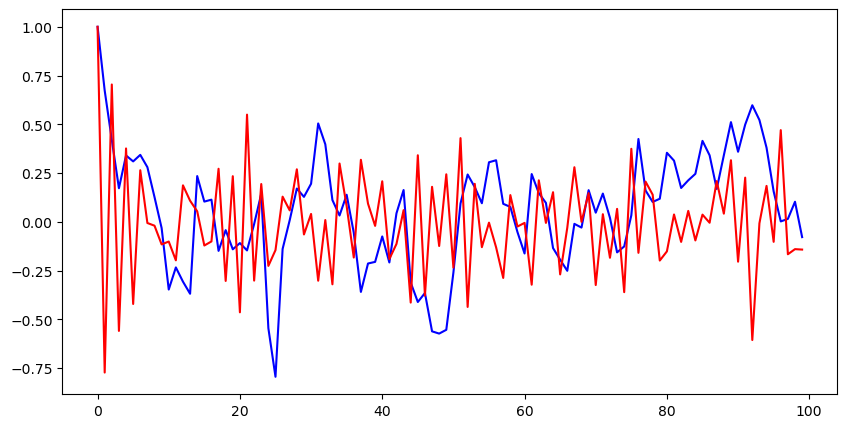

In [2]:
z1 = np.zeros(100)
z2 = np.zeros(100)
z1[0] = 1
z2[0] = 1
for i in range(1,100):
 z1[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn()
 z2[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn()
plt.figure(figsize = (10, 5))
plt.plot(z1, 'b')
plt.plot(z2, 'r')
plt.show()

<Figure size 1000x500 with 0 Axes>

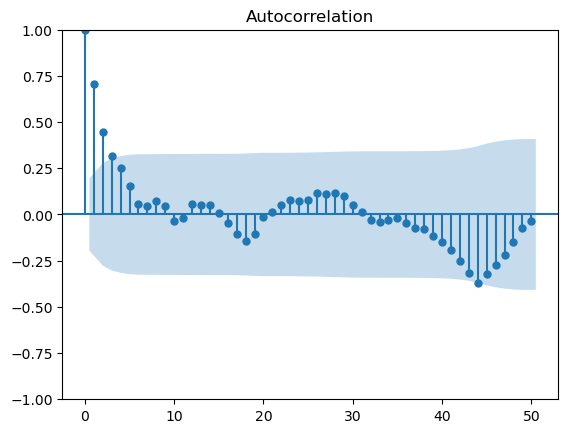

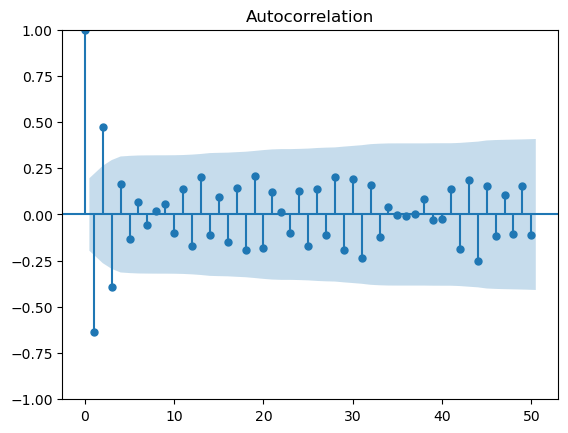

In [3]:
plt.figure(figsize = (10, 5))
plot_acf(z1, lags=50)
plot_acf(z2, lags=50)
plt.show()

5) Сравните эти графики между собой: укажите их сходства и различия, 
а также характерные особенности, которые позволяют отнести их к 
модели АР первого порядка.

Наиболее высоким коэффициентом автокорреляции оказался p(1), то есть первый порядок, что означает о присутствии тренда в обоих ВР. 

Оба графика с ростом лага затухают, однако первый график делает это постепенно, в этом можно убедиться, посмотрев на последующие порядки(2, 3, и т.д., то есть с ростом лага коэффициент автокореляции уменьшается), в отличие от второго, который затухает знакопеременно.

В самом деле, после 1-го порядка наибольшим идёт 2-й порядок с положительным коэффициентом, затем 3-й порядок снова отрицательный и так на протяжении всего графика. 

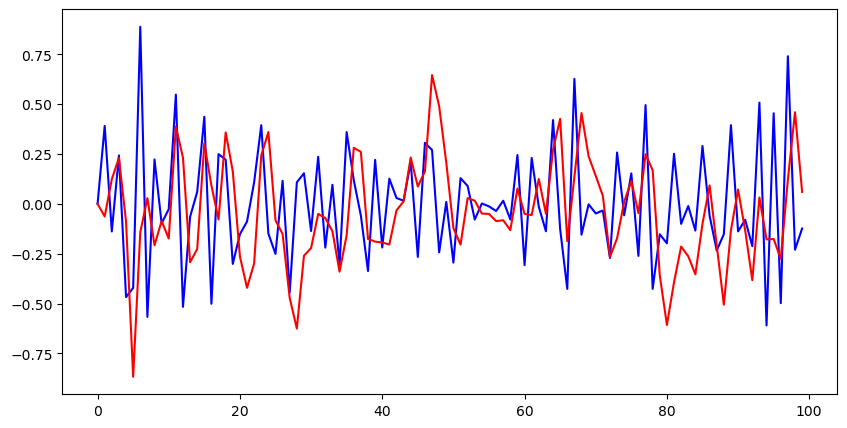

In [4]:
z3 = np.zeros(100)
z4 = np.zeros(100)
ar = 0.2 * np.random.randn(100)
for i in range(1, 100):
 z3[i] = ar[i] - 0.8 * ar[i - 1]
 z4[i] = ar[i] + 0.8 * ar[i - 1]
plt.figure(figsize = (10, 5))
plt.plot(z3, 'b')
plt.plot(z4, 'r')
plt.show()

<Figure size 1000x500 with 0 Axes>

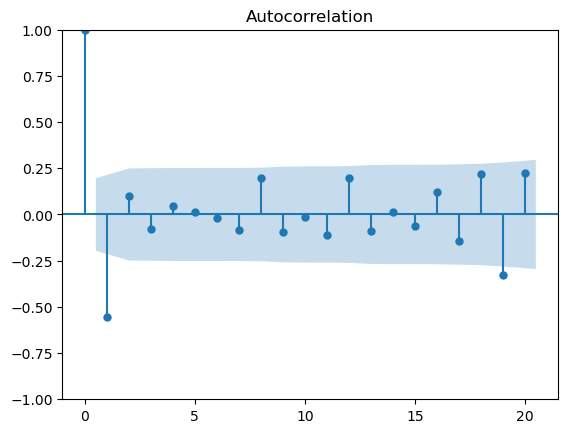

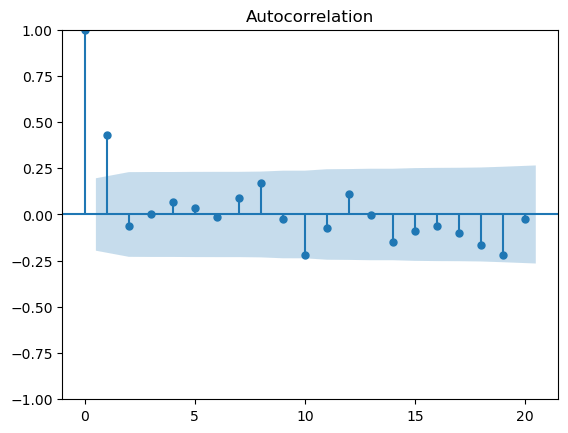

In [5]:
plt.figure(figsize = (10, 5))
plot_acf(z3, lags=20)
plot_acf(z4, lags=20)
plt.show()

Оба графика имеют наибольшее значение коэффициента автокорреляции при порядке 1, следовательно у них наблюдается тренд.

При дальнейшем визуальном осмотре можно выделить следующее:
1. На обоих графиках наблюдается затухающая знакопеременность
2. На первом графике знакопеременность чередуется через 1 точку, на втором же графике при визуальном осмотре похоже на синусоидную знакопеременность.

10 задание

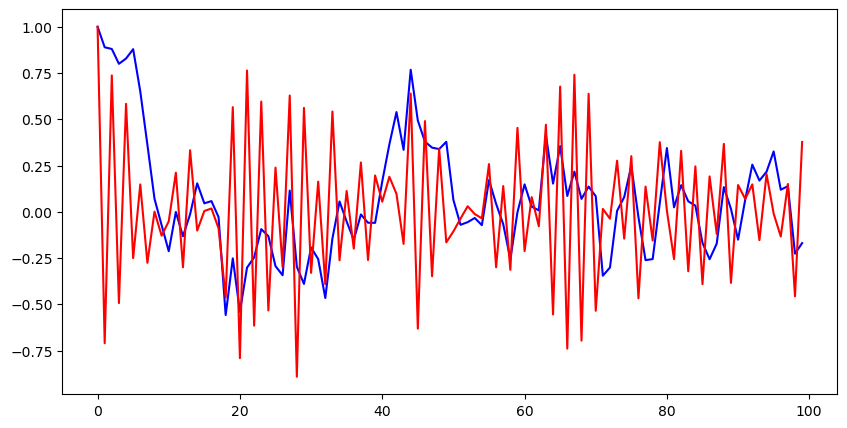

In [6]:
z5 = np.zeros(100)
z6 = np.zeros(100)
z5[0], z6[0] = 1, 1
a = 0.2 * np.random.randn(100)
for i in range(1, len(z5)):
    z5[i] = 0.8 * z5[i-1] + a[i] - 0.3 * a[i-1]
    z6[i] = -0.8 * z6[i-1] + a[i] - 0.3 * a[i-1]

plt.figure(figsize = (10, 5))
plt.plot(z5, 'b')
plt.plot(z6, 'r')
plt.show()

<Figure size 1000x500 with 0 Axes>

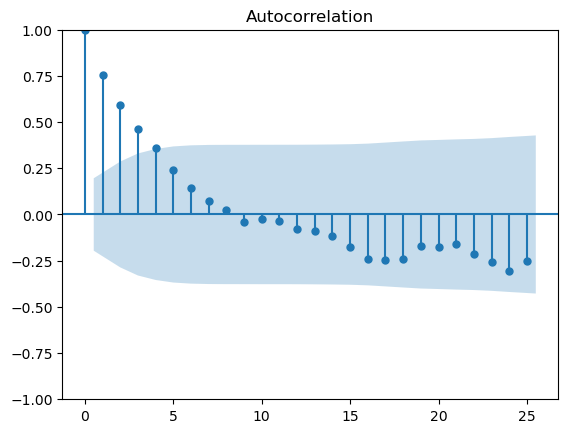

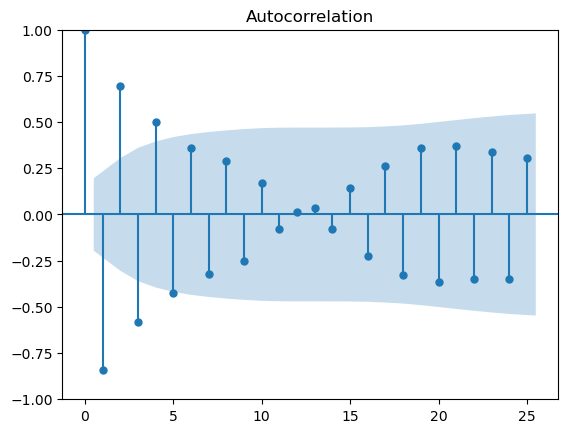

In [7]:
plt.figure(figsize = (10, 5))
plot_acf(z5, lags=len(z5)/4)
plot_acf(z6, lags=len(z5)/4)
plt.show()

In [8]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar = np.array([0.75, -0.25]) # задаем коэффициенты АР
ma = np.array([0.65, 0.35]) # задаем коэффициенты СС 
y = arma_generate_sample(np.r_[1, -ar], np.r_[1, ma], 100)
# создаем ВР для АРСС (2, 2) = АРПСС (2, 0, 2) из 100 отсчетов

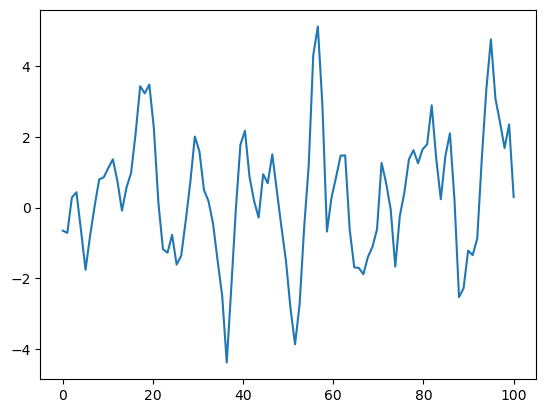

In [9]:
t = np.linspace(0, 100, 100)
plt.plot(t, y)

<Figure size 1000x500 with 0 Axes>

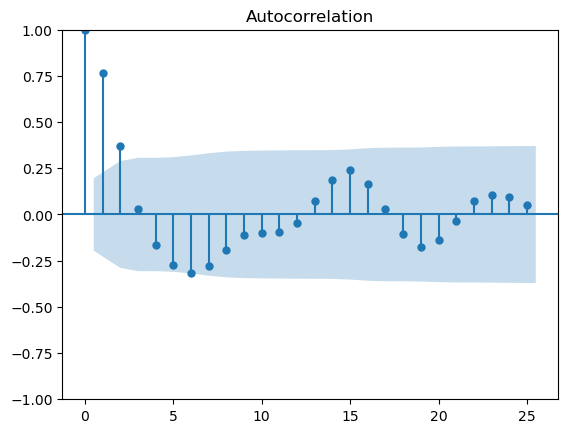

In [10]:
plt.figure(figsize = (10, 5))
plot_acf(y, lags=len(y)/4)
plt.show()

тут текст

13 задание

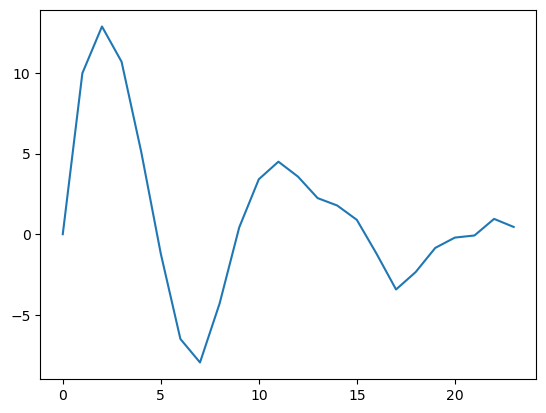

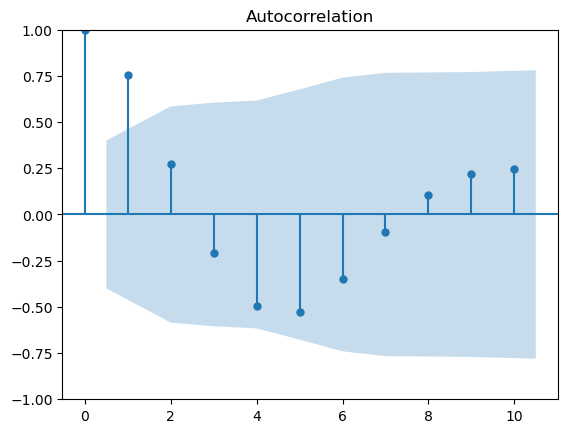

In [16]:
TEST = np.array([0.00, 9.99, 12.89, 10.70, 5.12, -1.21, -6.50, -7.96, -4.30, 0.42, 3.41, 
4.50, 3.57, 2.24, 1.78, 0.89, -1.20, -3.43, -2.35, -0.85, -0.21, -0.08, 0.95, 
0.45])

plt.plot(TEST)
plot_acf(TEST, lags = 10)
plt.show()


In [17]:
arima1 = ARIMA(TEST, order = (1, 0, 0)) # создаем модель
model_fit1 = arima1.fit() # подгоняем под ВР
print(model_fit1.summary()) # выводим таблицу результатов
arima2 = ARIMA(TEST, order = (2, 0, 0))
model_fit2 = arima2.fit()
print(model_fit2.summary())
arima3 = ARIMA(TEST, order = (3, 0, 0))
model_fit3 = arima3.fit()
print(model_fit3.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -62.321
Date:                Tue, 02 Apr 2024   AIC                            130.642
Time:                        12:50:13   BIC                            134.177
Sample:                             0   HQIC                           131.580
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0213      2.697      0.379      0.705      -4.264       6.307
ar.L1          0.7298      0.140      5.208      0.000       0.455       1.004
sigma2        10.2148      2.369      4.312      0.0

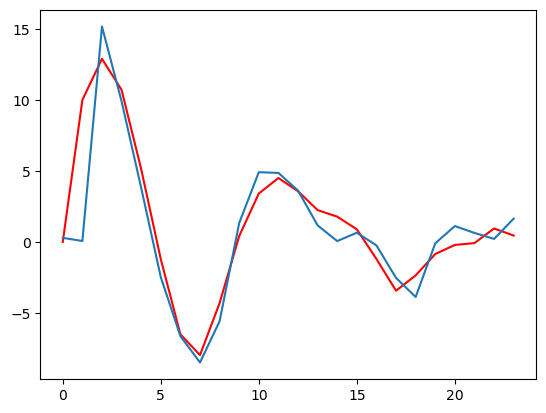

In [24]:
plt.plot(TEST, c = 'red')
plt.plot(model_fit2.fittedvalues)

In [25]:
import statsmodels.tsa.stattools as stt
stt.arma_order_select_ic(TEST)


E:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'bic':             0           1           2
 0  150.571083  129.219818  115.838488
 1  134.176597  120.042236  114.610652
 2   95.542899   96.955118   99.573675
 3   97.981298  100.050982  102.693659
 4   98.176969  103.926910  100.497398,
 'bic_min_order': (2, 0)}

In [26]:
file = h5py.File('Data/10.mat', 'r') 
data = file.get('z10') 
Z = np.array(data)
Z = Z.ravel()

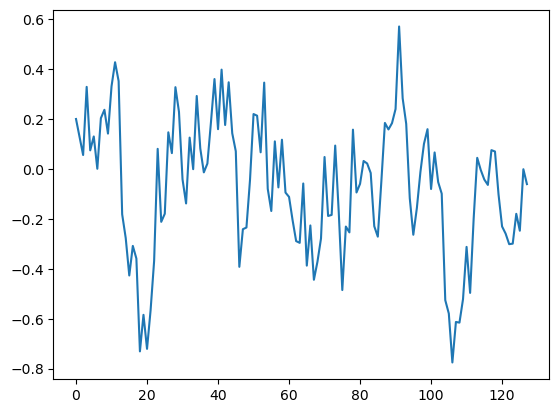

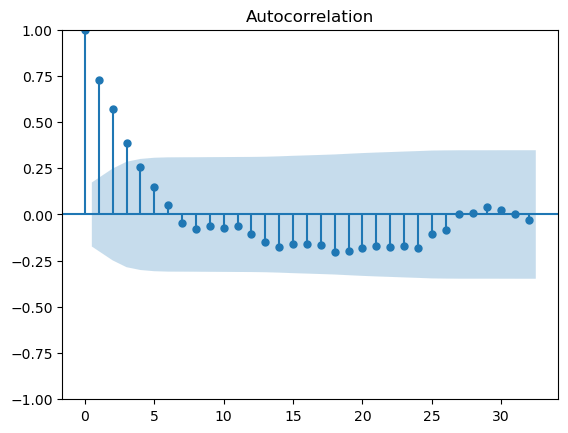

In [28]:
plt.plot(Z)
plot_acf(Z, lags = len(Z)/4)
plt.show()

AR(0), MA(0)
bic - 36.31419483313566, aic - 30.610134305296427
АРКФ - [], ССКФ - []


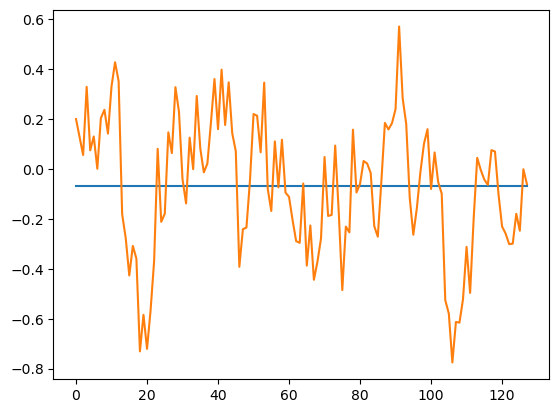

AR(0), MA(1)
bic - -13.866470661324737, aic - -22.42256145308359
АРКФ - [], ССКФ - [0.5208799]


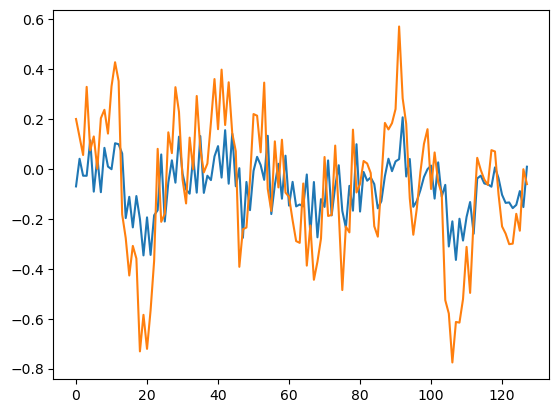

AR(1), MA(0)
bic - -55.18493440692933, aic - -63.74102519868818
АРКФ - [0.72644356], ССКФ - []


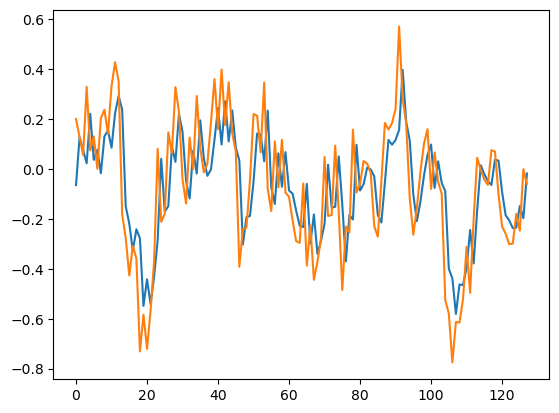

AR(1), MA(1)
bic - -51.20723405126296, aic - -62.61535510694142
АРКФ - [0.77191338], ССКФ - [-0.09642865]


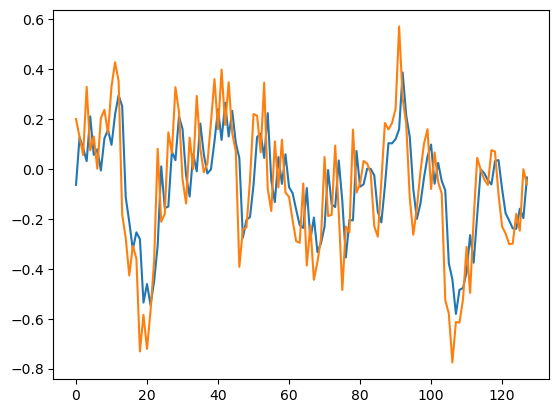

AR(2), MA(0)
bic - -51.52879248303343, aic - -62.93691353871189
АРКФ - [0.65582207 0.09623364], ССКФ - []


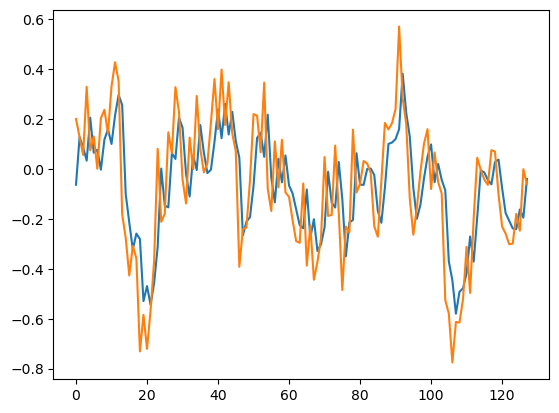

AR(2), MA(1)
bic - -47.98063119823519, aic - -62.24078251783327
АРКФ - [0.09388677 0.51421878], ССКФ - [0.55921718]


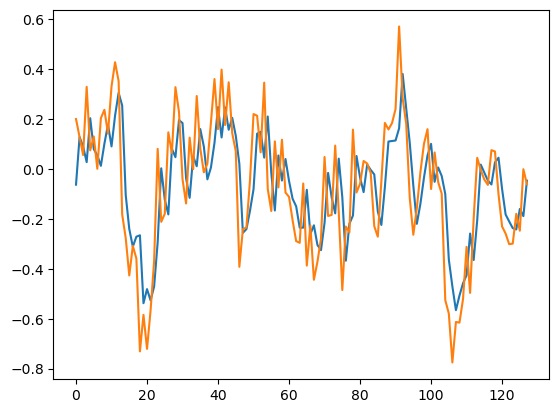

AR(3), MA(0)
bic - -48.82934977382388, aic - -63.08950109342196
АРКФ - [ 0.66864864  0.18168443 -0.12892415], ССКФ - []


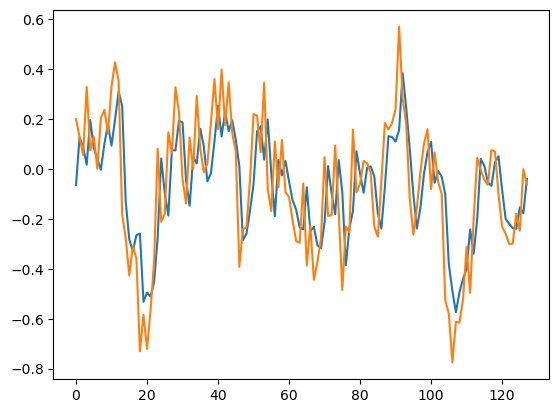

AR(3), MA(1)
bic - -45.95035327807434, aic - -63.06253486159204
АРКФ - [ 1.60994288 -0.48929355 -0.14627131], ССКФ - [-0.99729805]


E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


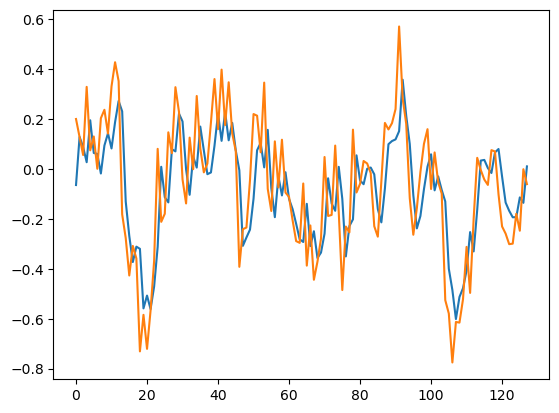

In [43]:
def Arima(x, order):
    arima = ARIMA(x, order = order) # создаем модель
    model_fit = arima.fit() # подгоняем под ВР
    return model_fit

for i in range(4):
    for j in range(2):
        a = Arima(Z, (i, 0, j)) # выводим таблицу результатов
        print(f'AR({i}), MA({j})')
        print(f'bic - {a.bic}, aic - {a.aic}')
        print(f'АРКФ - {a.arparams}, ССКФ - {a.maparams}')
        plt.plot(a.fittedvalues)
        plt.plot(Z)
        plt.show()

Среди всех моделей, нас устроит модель ARMA(1, 0): BIC-критерий равен -55, AIC-критерий равен -63. Критерий BIC является самым наименьшим средих других порядков, кроме этого, при взгляде на получившиеся графики также можно убедиться в правильном выборе модели. Модели с более высоким порядком будут отвергнуты по причине избыточности параметров.

28 задание